In [376]:
import pandas as pd
import numpy as np

In [432]:
test = pd.read_csv("testbc7185d.csv")

In [433]:
df_calls = pd.read_csv("callsf0d4f5a.csv")

In [434]:
call_id_fortest = test['call_id']

In [435]:
df_reasons = pd.read_csv("reason18315ff.csv")

In [436]:
df_sentiments = pd.read_csv("sentiment_statisticscc1e57a.csv")

In [437]:
df_customer = pd.read_csv("customers2afd6ea.csv")

In [438]:
test = pd.merge(test, df_calls, on='call_id', how='inner') 

In [439]:
train = pd.merge(df_calls, df_reasons, on='call_id', how='inner') 

In [440]:
test = pd.merge(test, df_sentiments, on='call_id', how='inner') 

In [441]:
train_x = pd.merge(train, df_sentiments, on='call_id', how='inner') 

In [442]:
test = pd.merge(test, df_customer, on='customer_id', how='inner') 

In [443]:
train_x = pd.merge(train_x, df_customer, on='customer_id', how='inner') 

In [444]:
train_x.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,Matthew Foster,4.0
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Booking,519057,calm,neutral,0.02,0.35,Tammy Walters,NaN
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,IRROPS,158319,neutral,polite,-0.13,0.32,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,Upgrade,488324,neutral,frustrated,-0.20,0.20,David Wilkins,2.0
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Seating,721730,neutral,polite,-0.05,0.35,Elizabeth Daniels,0.0


In [445]:
test.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code
0,7732610078,4029953261,488324,8/1/2024 0:23,8/1/2024 0:34,8/1/2024 1:32,\n\nAgent: Thank you for calling United Airlin...,488324,neutral,neutral,-0.06,0.58,Cassandra Flores,NaN
1,2400299738,2034858976,963118,8/1/2024 1:33,8/1/2024 1:41,8/1/2024 1:54,\n\nAgent: Thank you for calling United Airlin...,963118,calm,angry,0.01,0.40,Hannah Drake,0.0
2,6533095063,1874845993,519057,8/1/2024 2:17,8/1/2024 2:27,8/1/2024 2:29,\n\nAgent: Thank you for calling United Airlin...,519057,neutral,calm,0.00,0.49,Larry Nolan,NaN
3,7774450920,2633426588,963118,8/1/2024 2:49,8/1/2024 2:53,8/1/2024 2:57,\n\nAgent: Thank you for calling United Airlin...,963118,calm,angry,0.02,0.28,Shelby Wright,NaN
4,9214147168,8334856492,158319,8/1/2024 2:49,8/1/2024 2:55,8/1/2024 2:59,\n\nAgent: Thank you for calling United Airlin...,158319,neutral,frustrated,-0.12,0.12,Mr. Thomas Simmons,3.0


In [446]:
def clean_text(text):
    text = text.replace('-', ' ')
    text = ' '.join(text.split())
    text = text.replace('and', '&')
    return text

train_x['primary_call_reason'] = train_x['primary_call_reason'].apply(clean_text)

In [447]:
test.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'agent_id_y', 'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'customer_name', 'elite_level_code'],
      dtype='object')

In [448]:
train_x.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'primary_call_reason', 'agent_id_y', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'customer_name',
       'elite_level_code'],
      dtype='object')

In [449]:
train_x['call_start_datetime'] = pd.to_datetime(train_x['call_start_datetime'])
train_x['agent_assigned_datetime'] = pd.to_datetime(train_x['agent_assigned_datetime'])
train_x['call_end_datetime'] = pd.to_datetime(train_x['call_end_datetime'])

In [450]:
test['call_start_datetime'] = pd.to_datetime(test['call_start_datetime'])
test['agent_assigned_datetime'] = pd.to_datetime(test['agent_assigned_datetime'])
test['call_end_datetime'] = pd.to_datetime(test['call_end_datetime'])

In [451]:
train_x['average_speed_to_answer'] = train_x['agent_assigned_datetime'] - train_x['call_start_datetime']
train_x['average_handle_time'] = train_x['call_end_datetime'] - train_x['agent_assigned_datetime']

In [452]:
test['average_speed_to_answer'] = test['agent_assigned_datetime'] - test['call_start_datetime']
test['average_handle_time'] = test['call_end_datetime'] - test['agent_assigned_datetime']

In [453]:
train_x = train_x.drop(['agent_assigned_datetime', 'call_start_datetime', 'call_end_datetime'], axis = 1)

In [454]:
test = test.drop(['agent_assigned_datetime', 'call_start_datetime', 'call_end_datetime'], axis = 1)

In [455]:
train_x.shape

(66653, 14)

In [456]:
train_x.isnull().sum()

call_id                        0
customer_id                    0
agent_id_x                     0
call_transcript                0
primary_call_reason            0
agent_id_y                     0
agent_tone                   198
customer_tone                  0
average_sentiment            101
silence_percent_average        0
customer_name                  0
elite_level_code           23959
average_speed_to_answer        0
average_handle_time            0
dtype: int64

In [457]:
test.isnull().sum()

call_id                       0
customer_id                   0
agent_id_x                    0
call_transcript               0
agent_id_y                    0
agent_tone                   19
customer_tone                 0
average_sentiment             8
silence_percent_average       0
customer_name                 0
elite_level_code           1808
average_speed_to_answer       0
average_handle_time           0
dtype: int64

In [458]:
train_x['elite_level_code'] = train_x['elite_level_code'].fillna(0.0)

In [459]:
test['elite_level_code'] = test['elite_level_code'].fillna(0.0)

In [460]:
mode_agent_tone = train_x['agent_tone'].mode()[0]
train_x['agent_tone'] = train_x['agent_tone'].fillna(mode_agent_tone)

mean_average_sentiment = train_x['average_sentiment'].mean()
train_x['average_sentiment'] = train_x['average_sentiment'].fillna(mean_average_sentiment)

In [461]:
mode_agent_tone = test['agent_tone'].mode()[0]
test['agent_tone'] = test['agent_tone'].fillna(mode_agent_tone)

mean_average_sentiment = test['average_sentiment'].mean()
test['average_sentiment'] = test['average_sentiment'].fillna(mean_average_sentiment)

In [462]:
train_x.isnull().sum()

call_id                    0
customer_id                0
agent_id_x                 0
call_transcript            0
primary_call_reason        0
agent_id_y                 0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
customer_name              0
elite_level_code           0
average_speed_to_answer    0
average_handle_time        0
dtype: int64

In [463]:
test.isnull().sum()

call_id                    0
customer_id                0
agent_id_x                 0
call_transcript            0
agent_id_y                 0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
customer_name              0
elite_level_code           0
average_speed_to_answer    0
average_handle_time        0
dtype: int64

In [465]:
import nltk
from nltk.corpus import stopwords
import tensorflow_hub as hub

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words[:50])  
X_text = train_x['call_transcript'].apply(preprocess_text)
X_test_text = test['call_transcript'].apply(preprocess_text)

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def embed_in_batches(data, batch_size=32):
    embeddings = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size]
        batch_embeddings = embed(batch.tolist())
        embeddings.append(batch_embeddings)
    return np.concatenate(embeddings)

X_text = embed_in_batches(X_text)
X_test_text = embed_in_batches(X_test_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [466]:
train_x = train_x.drop(['agent_id_x', 'agent_id_y', 'call_id', 'customer_id', 'customer_name'], axis = 1)

In [467]:
test = test.drop(['agent_id_x', 'agent_id_y', 'call_id', 'customer_id', 'customer_name'], axis = 1)

In [468]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
train_x['agent_tone'] = encoder.fit_transform(train_x['agent_tone'])
train_x['customer_tone'] = encoder.fit_transform(train_x['customer_tone'])

scaler = StandardScaler()
train_x['silence_percent_average'] = scaler.fit_transform(train_x[['silence_percent_average']])

test['agent_tone'] = encoder.transform(test['agent_tone'])
test['customer_tone'] = encoder.transform(test['customer_tone'])

test['silence_percent_average'] = scaler.transform(test[['silence_percent_average']])


In [469]:
train_x.columns

Index(['call_transcript', 'primary_call_reason', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'elite_level_code',
       'average_speed_to_answer', 'average_handle_time'],
      dtype='object')

In [470]:
test.columns

Index(['call_transcript', 'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'elite_level_code',
       'average_speed_to_answer', 'average_handle_time'],
      dtype='object')

In [471]:
import pandas as pd
import scipy
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import LabelEncoder

X = train_x.drop(columns=['primary_call_reason', 'call_transcript'])  
timedelta_cols = X.select_dtypes(include=['timedelta64']).columns
for col in timedelta_cols:
    X[col] = X[col].dt.total_seconds()
if isinstance(X_text, pd.DataFrame):
    X_text = csr_matrix(X_text.values) 
X = csr_matrix(X.values) 

X = hstack([X_text, X])
y = train_x['primary_call_reason']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [472]:
train_x = train_x.drop(['call_transcript', 'primary_call_reason'], axis = 1)

In [473]:
train_x.columns

Index(['agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'elite_level_code',
       'average_speed_to_answer', 'average_handle_time'],
      dtype='object')

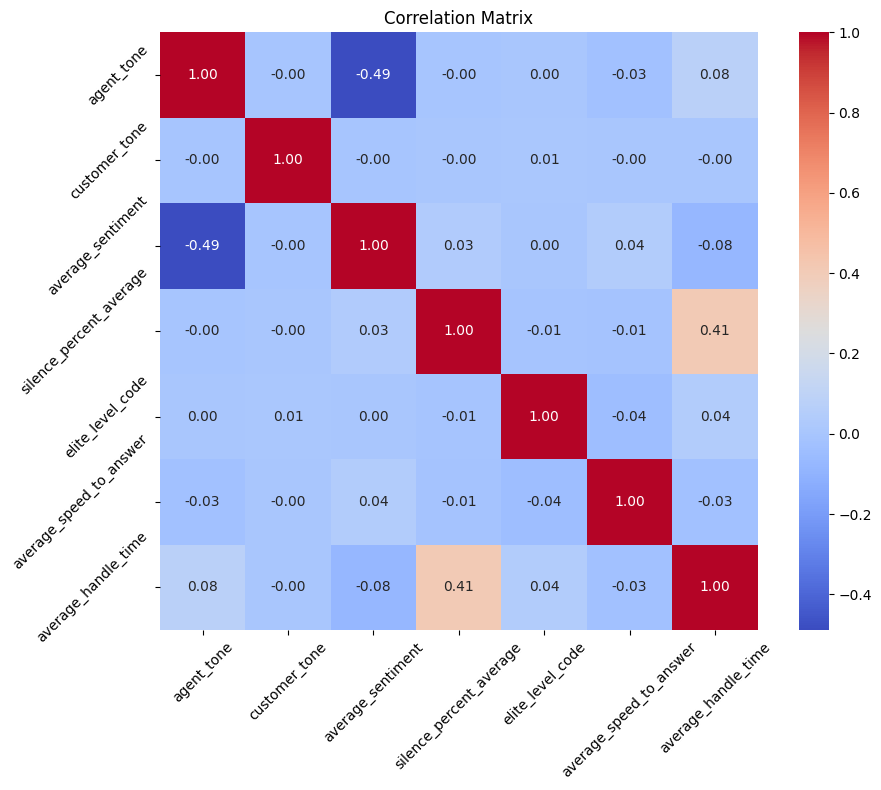

In [474]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)

plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  
plt.show()


The correlation matrix shows the relationships between key call center features, with values ranging from -1 to 1:

Negative correlation between agent_tone and average_sentiment (-0.49) indicates that more negative agent tone correlates with lower sentiment scores.
Positive correlation between silence_percent_average and average_handle_time (0.41) suggests that longer silences during calls tend to increase the handle time.
Other feature pairs, such as customer_tone and elite_level_code, show little to no correlation, suggesting independence.

In [475]:
import pandas as pd
import scipy
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import LabelEncoder

test = test.drop(columns=['call_transcript'])  
timedelta_cols = test.select_dtypes(include=['timedelta64']).columns
for col in timedelta_cols:
    test[col] = test[col].dt.total_seconds()
if isinstance(X_test_text, pd.DataFrame):
    X_test_text = csr_matrix(X_test_text.values)  
test = csr_matrix(test.values)  

test = hstack([X_test_text, test])

In [476]:
test

<COOrdinate sparse matrix of dtype 'float64'
	with 2671846 stored elements and shape (5157, 519)>

In [477]:
y

array([18,  1,  8, ..., 17, 17,  5])

In [479]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [480]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))  
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))  
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))  
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))  
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))  
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))  
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))  
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))  
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))  
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))  
model.add(BatchNormalization())
model.add(Dense(20, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])




c:\PythonPersonal\Extras\myvenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2715 - loss: 2.2621 - val_accuracy: 0.3285 - val_loss: 1.8154
Epoch 2/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3323 - loss: 1.8995 - val_accuracy: 0.3220 - val_loss: 1.8692
Epoch 3/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3394 - loss: 1.8631 - val_accuracy: 0.3559 - val_loss: 1.7458
Epoch 4/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3373 - loss: 1.8566 - val_accuracy: 0.3413 - val_loss: 1.8042
Epoch 5/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3467 - loss: 1.8332 - val_accuracy: 0.3333 - val_loss: 1.8105
Epoch 6/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3577 - loss: 1.8134 - val_accuracy: 0.3639 - val_loss: 1.7152
Epoch 7/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3593 - loss: 1.8060 - val_accuracy: 0.3856 - val_loss: 1.7200
Epoch 8/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3648 - loss: 1

In [481]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3972 - loss: 1.6736
Test Loss: 1.6710041761398315, Test Accuracy: 0.3995199203491211


In [484]:
test

<COOrdinate sparse matrix of dtype 'float64'
	with 2671846 stored elements and shape (5157, 519)>

In [504]:
predictions = model.predict(test)




162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [505]:

predicted_primary_call_reason = np.argmax(predictions, axis=1)  

predicted_call_types = label_encoder.inverse_transform(predicted_primary_call_reason)

predictions_df = pd.DataFrame({
    'call_id': call_id_fortest,  
    'primary_call_reason': predicted_call_types
})

print(predictions_df)


         call_id primary_call_reason
0     7732610078    Voluntary Change
1     2400299738              IRROPS
2     6533095063             Seating
3     7774450920              IRROPS
4     9214147168        Mileage Plus
...          ...                 ...
5152  5300201106      Communications
5153   727694488              IRROPS
5154   147487837              IRROPS
5155  5330794838              IRROPS
5156  8332067080              IRROPS

[5157 rows x 2 columns]


In [506]:
# Save the DataFrame to a CSV file
predictions_df.to_csv('test_ChanduChampion2.csv', index=False)